Dataset Preparation
----------------------

In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
# The dataset is loaded from a CSV file named 'diabetes.csv'
data = pd.read_csv('./datasets/diabetes.csv')

# Check for missing values
# Display the count of missing values in each column
print(data.isnull().sum())

# Split the data into features and target
# Separate the features (X) from the target (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split the data into train, validation, and test sets
# The data is split into 70% training and 30% temporary (X_temp, y_temp)
# The temporary set is further split into 50% validation and 50% test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reset indices of the feature and target DataFrames
X_train_df = X_train.reset_index(drop=True)
X_val_df = X_val.reset_index(drop=True)
X_test_df = X_test.reset_index(drop=True)

y_train_df = y_train.reset_index(drop=True)
y_val_df = y_val.reset_index(drop=True)
y_test_df = y_test.reset_index(drop=True)

# Save the datasets as CSV files
# Combine the feature DataFrames with their corresponding target variables
# Save the combined DataFrames as CSV files for training, validation, and testing
train_data = pd.concat([X_train_df, y_train_df], axis=1)
train_data.head()
val_data = pd.concat([X_val_df, y_val_df], axis=1)
val_data.head()
test_data = pd.concat([X_test_df, y_test_df], axis=1)
test_data.head()
train_data.to_csv('./datasets/train_data_not_scaled.csv', index=False)
val_data.to_csv('./datasets/val_data_not_scaled.csv', index=False)
test_data.to_csv('./datasets/test_data_not_scaled.csv', index=False)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Model Training
----------------------

In [2]:
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
import xgboost as xgb
import pickle

# Create a DMatrix for training, validation, and test data
# DMatrix is an optimized data structure that XGBoost uses to train and predict
dtrain = xgb.DMatrix(data=X_train.to_numpy(), label=y_train)
dval = xgb.DMatrix(data=X_val.to_numpy(), label=y_val)
dtest = xgb.DMatrix(data=X_test.to_numpy(), label=y_test)

# Set the hyperparameters for the XGBoost model
params = {"colsample_bytree": 0.8247176589617523, 
          "gamma": 0.30255939244569324, 
          "learning_rate": 0.07102942639067696, 
          "max_depth": 9, 
          "subsample": 0.8171213407907597, 
          "eval_metric": "auc"}

num_round = 100  # Number of boosting rounds
# Train the model with the best parameters
evallist = [(dval, 'eval')]  # Evaluation set
bst = xgb.train(params, dtrain, num_round, evals=evallist, early_stopping_rounds=10)

# Evaluate the model on the test set
preds = bst.predict(dtest)  # Predict probabilities
predictions = [round(value) for value in preds]  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, preds)
logloss = log_loss(y_test, preds)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Log Loss: {logloss:.4f}")

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Calculate evaluation metrics per class
precision_class_0 = precision_score(y_test, predictions, pos_label=0)
recall_class_0 = recall_score(y_test, predictions, pos_label=0)
f1_class_0 = f1_score(y_test, predictions, pos_label=0)

precision_class_1 = precision_score(y_test, predictions, pos_label=1)
recall_class_1 = recall_score(y_test, predictions, pos_label=1)
f1_class_1 = f1_score(y_test, predictions, pos_label=1)

# Calculate the ROC AUC for the entire test set
roc_auc = roc_auc_score(y_test, preds)

# Print classification report to see all metrics at once
classification_report_output = classification_report(y_test, predictions)

# Display the results
resu = {
    'Precision_Class_0': precision_class_0,
    'Recall_Class_0': recall_class_0,
    'F1_Score_Class_0': f1_class_0,
    'Precision_Class_1': precision_class_1,
    'Recall_Class_1': recall_class_1,
    'F1_Score_Class_1': f1_class_1,
    'ROC_AUC': roc_auc,
    'Classification_Report': classification_report_output
}

print(resu)
# Save the model in JSON format
bst.save_model('./models/diabetes_xgb_model_proofs.json')
print("Model trained and evaluated successfully!")

# Save the model using pickle
with open('./models/diabetes_xgb_model_proofs.pkl', 'wb') as f:
    pickle.dump(bst, f)


[0]	eval-auc:0.66771
[1]	eval-auc:0.72332
[2]	eval-auc:0.75901
[3]	eval-auc:0.76975
[4]	eval-auc:0.76386
[5]	eval-auc:0.76698
[6]	eval-auc:0.76091
[7]	eval-auc:0.77062
[8]	eval-auc:0.76784
[9]	eval-auc:0.76646
[10]	eval-auc:0.76369
[11]	eval-auc:0.76923
[12]	eval-auc:0.77755
[13]	eval-auc:0.77755
[14]	eval-auc:0.77581
[15]	eval-auc:0.78170
[16]	eval-auc:0.78933
[17]	eval-auc:0.78760
[18]	eval-auc:0.78621
[19]	eval-auc:0.79071
[20]	eval-auc:0.78621
[21]	eval-auc:0.78725
[22]	eval-auc:0.78933
[23]	eval-auc:0.78586
[24]	eval-auc:0.78517
[25]	eval-auc:0.78552
[26]	eval-auc:0.78552
[27]	eval-auc:0.78725
[28]	eval-auc:0.78552
[29]	eval-auc:0.78482
Accuracy: 0.7845
ROC AUC: 0.8214
Log Loss: 0.5025
{'Precision_Class_0': 0.8243243243243243, 'Recall_Class_0': 0.8356164383561644, 'F1_Score_Class_0': 0.8299319727891157, 'Precision_Class_1': 0.7142857142857143, 'Recall_Class_1': 0.6976744186046512, 'F1_Score_Class_1': 0.7058823529411765, 'ROC_AUC': 0.8214399490283529, 'Classification_Report': '    

Obtained performance
----------------------
Accuracy: 0.7845
ROC AUC: 0.8214
Log Loss: 0.5025

Feature Importance
----------------------

In [3]:
feature_importances = bst.get_score(importance_type='weight')

# Sort features by importance
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
sorted_features

[('f1', 116.0),
 ('f5', 115.0),
 ('f6', 103.0),
 ('f2', 85.0),
 ('f7', 80.0),
 ('f4', 72.0),
 ('f0', 64.0),
 ('f3', 43.0)]

Covariate shift Simulation
---------------------------

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
import xgboost as xgb
import pickle

# Load the model
with open('./models/diabetes_xgb_model_proofs.pkl', 'rb') as f:
    bst = pickle.load(f)

original_test_data = pd.read_csv("./datasets/test_data_not_scaled.csv")
X_test = original_test_data.drop(columns=['Outcome'])
y_test = original_test_data['Outcome']

# Function to simulate covariate shift by adding noise
def simulate_covariate_shift(X, shift_levels, shift_features=None):
    if shift_features is None:
        shift_features = X.columns
    
    shifted_datasets = {}  # To store datasets with different shift levels
    
    for level in shift_levels:
        np.random.seed(int(1 * level))
        X_shifted = X.copy()
        for feature in shift_features:
            feature_std = X[feature].std()  # Calculate the standard deviation of the feature
            shift_intensity = level * feature_std  # Scale the noise by the shift level and the feature's std deviation
            shift = np.random.normal(loc=0, scale=shift_intensity, size=X[feature].shape)
            X_shifted[feature] += shift
        shifted_datasets[level] = X_shifted
    
    return shifted_datasets

# Select features to shift (for example, 'Glucose', 'BMI', 'DiabetesPedigreeFunction')
shift_features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction']

# Define different levels of noise intensity (as multiples of the standard deviation)
shift_levels = [0.5, 1, 2, 4]

# Simulate covariate shift on the test set
shifted_datasets = simulate_covariate_shift(pd.DataFrame(X_test, columns=X_test.columns), shift_levels=shift_levels, shift_features=shift_features)

# Loop through each shifted dataset and evaluate the model
results = []

for level, X_test_shifted in shifted_datasets.items():
    # Save the shifted test set as a CSV file
    X_test_shifted_df = pd.DataFrame(X_test_shifted, columns=X_test.columns).reset_index(drop=True)
    y_shifted_df = y_test.reset_index(drop=True)
    
    shifted_data = pd.concat([X_test_shifted_df, y_shifted_df], axis=1)
    shifted_data.to_csv(f'./datasets/test_data_shifted_level_{level}_unscaled.csv', index=False)
    
    # Evaluate the model on the shifted test set
    dtest_shifted = xgb.DMatrix(data=X_test_shifted, label=y_test)
    preds_shifted = bst.predict(dtest_shifted)
    predictions_shifted = [round(value) for value in preds_shifted]
    
    # Calculate evaluation metrics for the shifted test set
    accuracy_shifted = accuracy_score(y_test, predictions_shifted)
    roc_auc_shifted = roc_auc_score(y_test, preds_shifted)
    logloss_shifted = log_loss(y_test, preds_shifted)
    
    # Store the results
    results.append({
        'shift_level': level,
        'accuracy': accuracy_shifted,
        'roc_auc': roc_auc_shifted,
        'log_loss': logloss_shifted
    })

# Convert the results to a DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)


   shift_level  accuracy   roc_auc  log_loss
0          0.5  0.750000  0.809812  0.509023
1          1.0  0.698276  0.732399  0.597764
2          2.0  0.586207  0.647340  0.660601
3          4.0  0.577586  0.588085  0.699436


Shifted Features Distribution
-------------------------------

C:\Users\lyna\AppData\Local\Temp\ipykernel_15732\1527022837.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(original[feature], label='Original', color='green', shade=True)
C:\Users\lyna\AppData\Local\Temp\ipykernel_15732\1527022837.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shifted_05[feature], label='Shift Intensity Level 0.5', color='#FFD700', shade=True)  # Light Yellow
C:\Users\lyna\AppData\Local\Temp\ipykernel_15732\1527022837.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(shifted_1[feature], label='Shift Intensity Level 1', color='#FF8C00', shade=True)  # Light Yellow
C:\Users\lyna\AppData\Loca

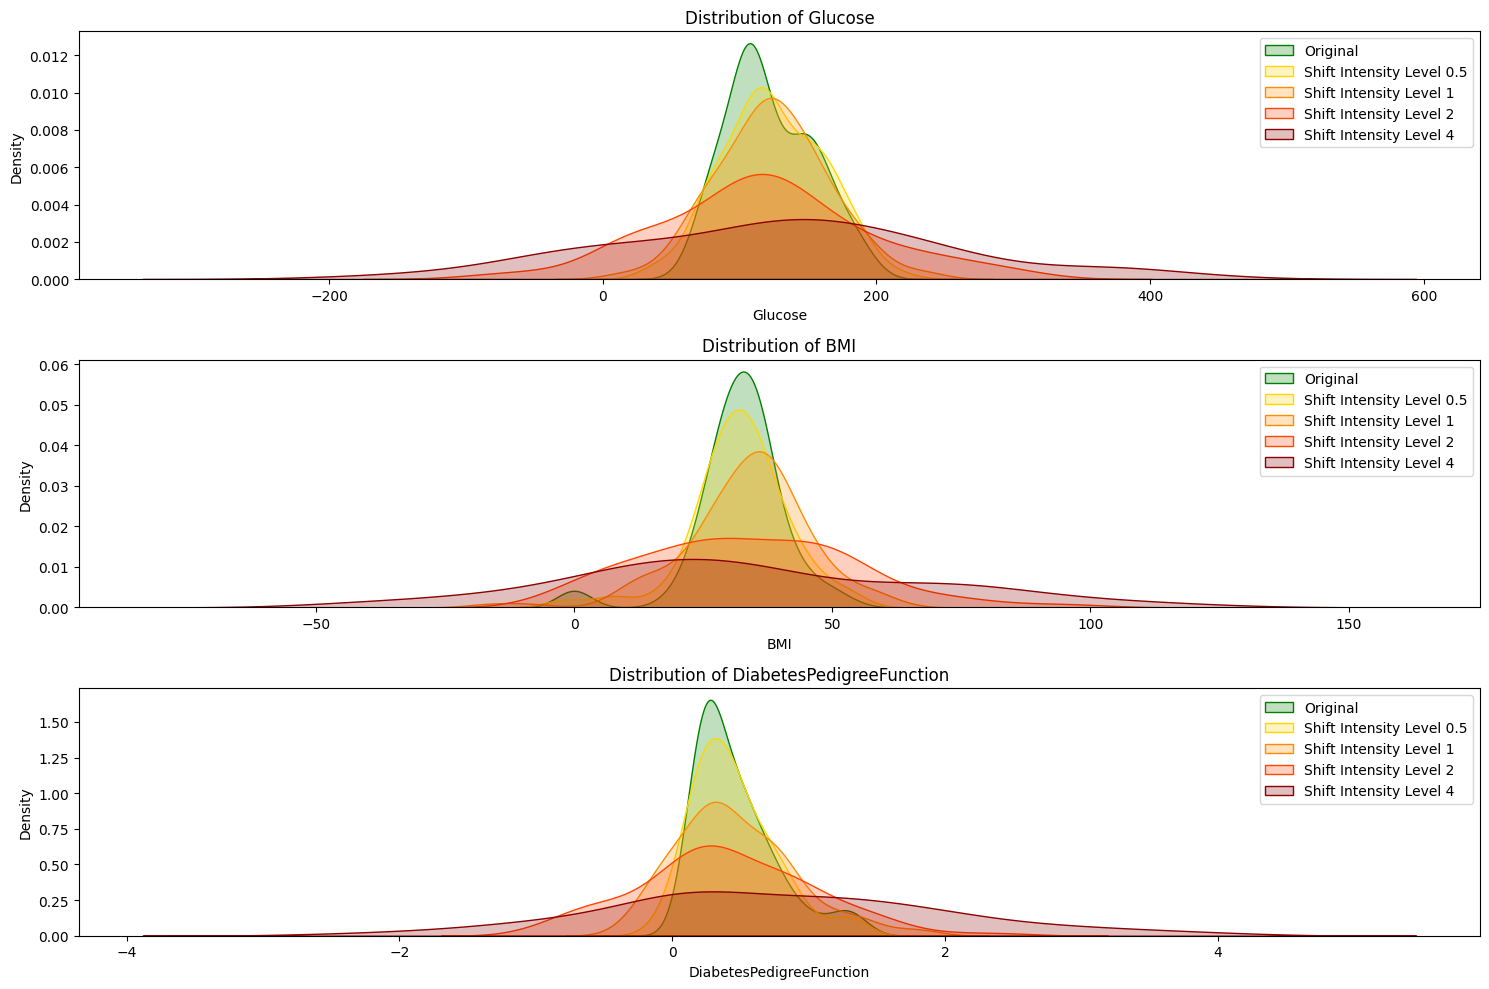

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original and shifted datasets from CSV files
original_data = pd.read_csv('./datasets/test_data_not_scaled.csv')

shifted_05 = pd.read_csv('./datasets/test_data_shifted_level_0.5_unscaled.csv')
shifted_1 = pd.read_csv('./datasets/test_data_shifted_level_1_unscaled.csv')
shifted_2 = pd.read_csv('./datasets/test_data_shifted_level_2_unscaled.csv')
shifted_4 = pd.read_csv('./datasets/test_data_shifted_level_4_unscaled.csv')


# Plotting function
def plot_feature_distributions_from_csv(original, shifted_1, shifted_2, shifted_4, features):
    plt.figure(figsize=(15, 10))
    
    for i, feature in enumerate(features):
        plt.subplot(len(features), 1, i + 1)
        
        sns.kdeplot(original[feature], label='Original', color='green', shade=True)
        sns.kdeplot(shifted_05[feature], label='Shift Intensity Level 0.5', color='#FFD700', shade=True)  # Light Yellow
        sns.kdeplot(shifted_1[feature], label='Shift Intensity Level 1', color='#FF8C00', shade=True)  # Light Yellow
        sns.kdeplot(shifted_2[feature], label='Shift Intensity Level 2', color='#FF4500', shade=True)  # Orange
        sns.kdeplot(shifted_4[feature], label='Shift Intensity Level 4', color='#8B0000', shade=True)     # Red
        
        
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Call the function with the features you want to compare
shift_features = ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
plot_feature_distributions_from_csv(original_data, shifted_1, shifted_2, shifted_4, shift_features)


Detectron Experiment
----------------------

In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from pprint import pprint
from MED3pa.datasets import DatasetsManager
from MED3pa.models import BaseModelManager, ModelFactory
from MED3pa.detectron import DetectronExperiment 

# Define different magnitudes of covariate shift to evaluate
shift_magnitudes = [0.5, 1, 2, 4]

# Loop through each shift magnitude, read the shifted dataset, and execute Detectron experiment
for level in shift_magnitudes:

    datasets = DatasetsManager()
    datasets.set_from_file("training", "./datasets/train_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("validation", "./datasets/val_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("reference", "./datasets/test_data_not_scaled.csv", "Outcome")
    
    # Load the shifted test set
    shifted_test_file = f'./datasets/test_data_shifted_level_{level}_unscaled.csv'
    datasets.set_from_file("testing", shifted_test_file, "Outcome")
    detectron_path = f'./results/detectron_experiment_{level}'

    factory = ModelFactory()
    loaded_model = factory.create_model_from_pickled("./models/diabetes_xgb_model_proofs.pkl")

    bm_manager = BaseModelManager()
    bm_manager.set_base_model(loaded_model) 

    # Run Detectron experiment
    detectron_results = DetectronExperiment.run(datasets=datasets, base_model_manager=bm_manager)
    # Print and store the results
    print(f"Results for shift magnitude: {level}")
    pprint(detectron_results.analyze_results(['original_disagreement_strategy', 'mannwhitney_strategy', 'enhanced_disagreement_strategy']))
    detectron_results.save(detectron_path)

    BaseModelManager.reset()



running seeds: 100%|██████████| 100/100 [00:13<00:00,  7.52it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:12<00:00,  8.13it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 0.5
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.05,
  'test_statistic': 8},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 0.8088368657679851,
  'significance_description': {'large': 1.0526315789473684,
                               'moderate': 23.157894736842106,
                               'small': 18.947368421052634,
                               'unsignificant shift': 56.84210526315789},
  'u_statistic': 4837.5},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.43157894736842106,
  'significance_description': {'large': 1.0526315789473684,
                               'moderate': 23.157894736842106,
                               'small': 18.947368421052634,
                               'unsignificant shift': 56.84210

running seeds: 100%|██████████| 100/100 [00:13<00:00,  7.43it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:15<00:00,  6.35it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 1
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.04,
  'test_statistic': 7},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 3.075897476835339e-08,
  'significance_description': {'large': 17.894736842105264,
                               'moderate': 46.31578947368421,
                               'small': 7.368421052631578,
                               'unsignificant shift': 28.421052631578945},
  'u_statistic': 2484.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.7157894736842105,
  'significance_description': {'large': 17.894736842105264,
                               'moderate': 46.31578947368421,
                               'small': 7.368421052631578,
                               'unsignificant shift': 28.42105263

running seeds: 100%|██████████| 100/100 [00:13<00:00,  7.18it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:16<00:00,  6.24it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 2
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.22,
  'test_statistic': 11},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 1.1541732594283197e-23,
  'significance_description': {'large': 48.421052631578945,
                               'moderate': 35.78947368421053,
                               'small': 13.684210526315791,
                               'unsignificant shift': 2.1052631578947367},
  'u_statistic': 775.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.9789473684210527,
  'significance_description': {'large': 48.421052631578945,
                               'moderate': 35.78947368421053,
                               'small': 13.684210526315791,
                               'unsignificant shift': 2.105263

running seeds: 100%|██████████| 100/100 [00:14<00:00,  6.75it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:15<00:00,  6.45it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 4
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.1,
  'test_statistic': 10},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 1.571554646795384e-30,
  'significance_description': {'large': 67.36842105263158,
                               'moderate': 32.631578947368425,
                               'small': 0,
                               'unsignificant shift': 0},
  'u_statistic': 210.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 1.0,
  'significance_description': {'large': 67.36842105263158,
                               'moderate': 32.631578947368425,
                               'small': 0,
                               'unsignificant shift': 0},
  'test_statistic': 11.378947368421052}]


Experiments Results
----------------------

| Shift Magnitude | Original Disagreement Test results  | Mann Whitney test results                                                                                      | Improved Disagreement Test results                                                                                    |
|-----------------|-------------------------------------|----------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------|
| 0.5             | p-value : 0.05                      | p-value: 0.8088 <br> shift significance: 56.84% not significant, 18.95% small, 1.05% large, 23.16% moderate      | shift probability: 0.432 <br> shift significance: 56.84% not significant, 18.95% small, 1.05% large, 23.16% moderate |
| 1               | p-value : 0.04                      | p-value: 3.08e-08 <br> shift significance: 28.42% not significant, 7.37% small, 17.89% large, 46.32% moderate   | shift probability: 0.716 <br> shift significance: 28.42% not significant, 7.37% small, 17.89% large, 46.32% moderate |
| 2               | p-value : 0.22                      | p-value: 1.15e-23 <br> shift significance: 2.11% not significant, 13.68% small, 48.42% large, 35.79% moderate   | shift probability: 0.979 <br> shift significance: 2.11% not significant, 13.68% small, 48.42% large, 35.79% moderate |
| 4               | p-value : 0.1                       | p-value: 1.57e-30 <br> shift significance: 0% not significant, 0% small, 67.37% large, 32.63% moderate          | shift probability: 1.0 <br> shift significance: 0% not significant, 0% small, 67.37% large, 32.63% moderate          |


Rejection Rates in Reference set and Test sets
-------------------------------------------------

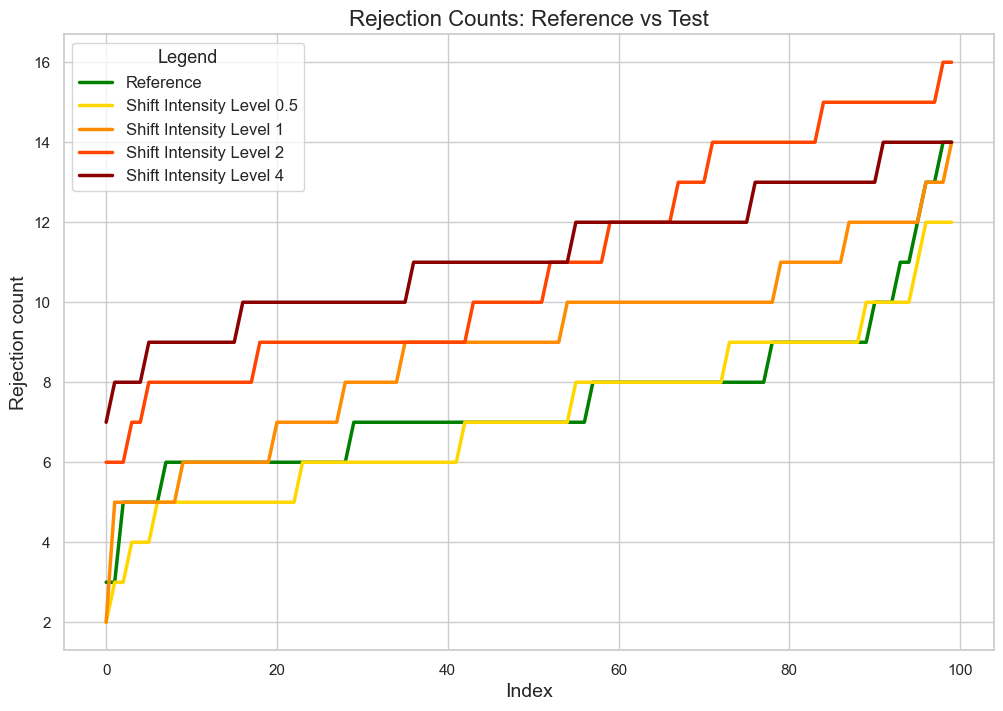

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Load the JSON files
with open('./results/detectron_experiment_0.5/rejection_counts.json', 'r') as file:
    data05 = json.load(file)

with open('./results/detectron_experiment_1/rejection_counts.json', 'r') as file:
    data1 = json.load(file)

with open('./results/detectron_experiment_2/rejection_counts.json', 'r') as file:
    data2 = json.load(file)

with open('./results/detectron_experiment_4/rejection_counts.json', 'r') as file:
    data4 = json.load(file)

# Save the arrays to variables
reference_counts = data1['reference']
test_counts05 = data05['test']
test_counts1 = data1['test']
test_counts2 = data2['test']
test_counts4 = data4['test']

# Set the style using seaborn
sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(12, 8))

# Plot reference counts
sns.lineplot(data=reference_counts, label='Reference', color='green', linewidth=2.5)

# Plot test counts with different shift levels
sns.lineplot(data=test_counts05, label='Shift Intensity Level 0.5', color='#FFD700', linewidth=2.5)
sns.lineplot(data=test_counts1, label='Shift Intensity Level 1', color='#FF8C00', linewidth=2.5)
sns.lineplot(data=test_counts2, label='Shift Intensity Level 2', color='#FF4500', linewidth=2.5)
sns.lineplot(data=test_counts4, label='Shift Intensity Level 4', color='#8B0000', linewidth=2.5)
        
# Add titles and labels
plt.title('Rejection Counts: Reference vs Test', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Rejection count', fontsize=14)

# Adjust legend and plot appearance
plt.legend(title='Legend', fontsize=12, title_fontsize='13')
plt.grid(True)

# Show the plot
plt.show()


P-values, Shift probability and Shift distribution by intensity
----------------------------------------------------------------------------

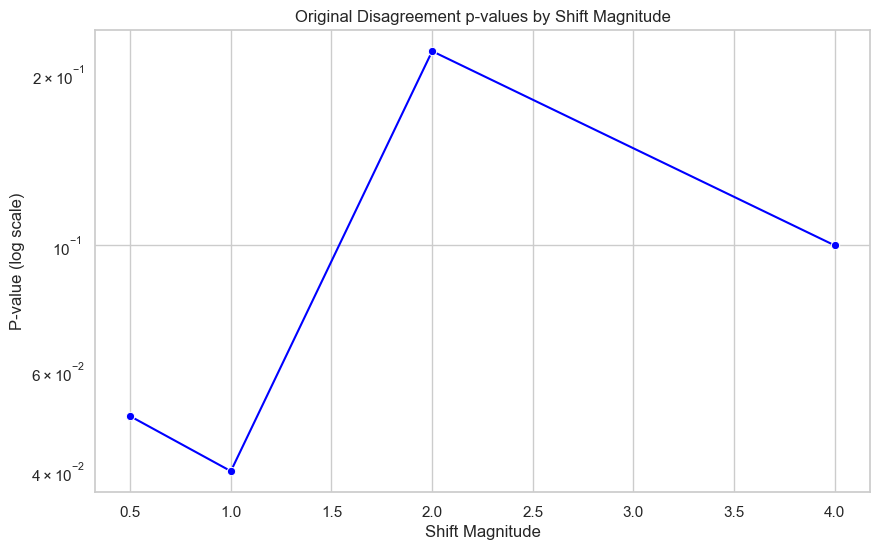

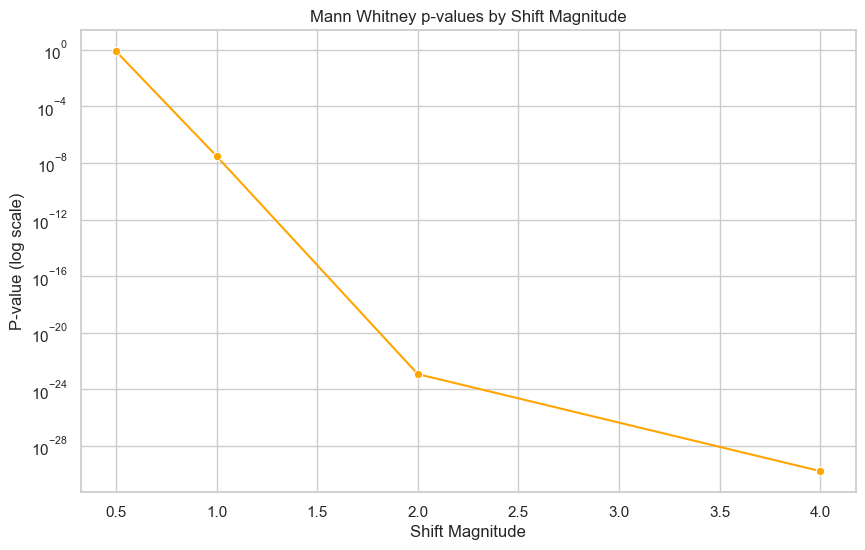

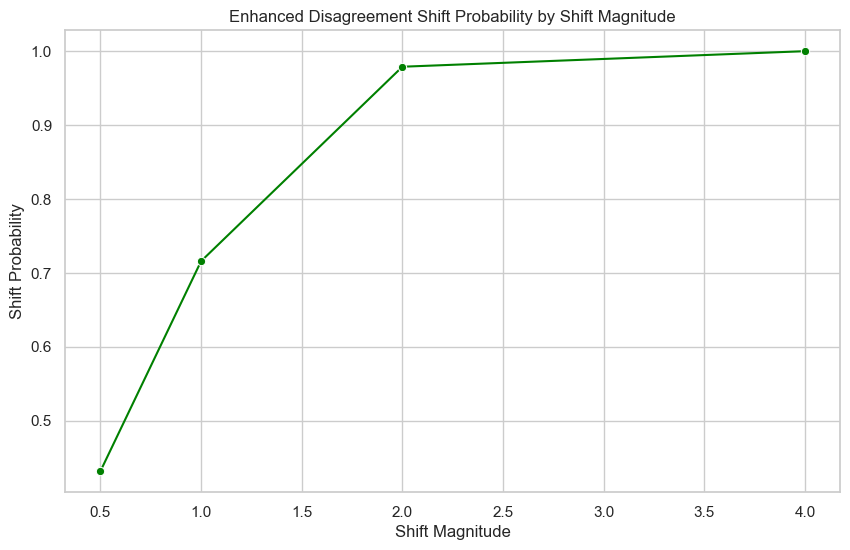

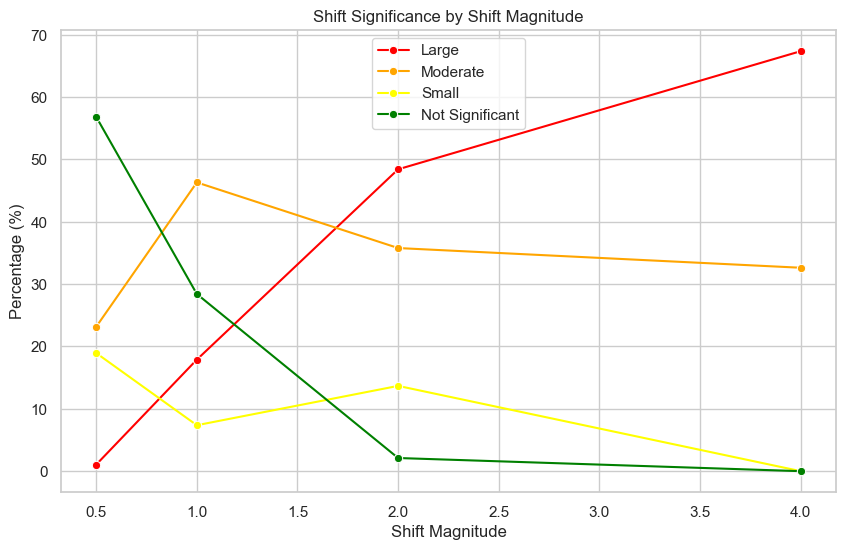

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Updated data extracted from the results
data = {
    "Shift Magnitude": [0.5, 1, 2, 4],
    "Original Disagreement p-value": [0.05, 0.04, 0.22, 0.1],
    "Mann Whitney p-value": [0.8088368657679851, 3.075897476835339e-08, 1.1541732594283197e-23, 1.571554646795384e-30],
    "Enhanced Disagreement Probability": [0.43157894736842106, 0.7157894736842105, 0.9789473684210527, 1.0],
    "Significant Large": [1.05, 17.89, 48.42, 67.37],
    "Significant Moderate": [23.16, 46.32, 35.79, 32.63],
    "Significant Small": [18.95, 7.37, 13.68, 0.0],
    "Not Significant": [56.84, 28.42, 2.11, 0.0]
}

df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Plotting Original Disagreement p-values
plt.figure(figsize=(10, 6))
sns.lineplot(x="Shift Magnitude", y="Original Disagreement p-value", data=df, marker='o', color='blue')
plt.yscale('log')  # Log scale for better visibility of small p-values
plt.title('Original Disagreement p-values by Shift Magnitude')
plt.ylabel('P-value (log scale)')
plt.xlabel('Shift Magnitude')
plt.grid(True)
plt.show()

# Plotting Mann Whitney p-values
plt.figure(figsize=(10, 6))
sns.lineplot(x="Shift Magnitude", y="Mann Whitney p-value", data=df, marker='o', color='orange')
plt.yscale('log')  # Log scale for better visibility of small p-values
plt.title('Mann Whitney p-values by Shift Magnitude')
plt.ylabel('P-value (log scale)')
plt.xlabel('Shift Magnitude')
plt.grid(True)
plt.show()

# Plotting Enhanced Disagreement Probability
plt.figure(figsize=(10, 6))
sns.lineplot(x="Shift Magnitude", y="Enhanced Disagreement Probability", data=df, marker='o', color='green')
plt.title('Enhanced Disagreement Shift Probability by Shift Magnitude')
plt.ylabel('Shift Probability')
plt.xlabel('Shift Magnitude')
plt.grid(True)
plt.show()

# Plotting significance descriptions
plt.figure(figsize=(10, 6))
sns.lineplot(x="Shift Magnitude", y="Significant Large", data=df, marker='o', color='red', label='Large')
sns.lineplot(x="Shift Magnitude", y="Significant Moderate", data=df, marker='o', color='orange', label='Moderate')
sns.lineplot(x="Shift Magnitude", y="Significant Small", data=df, marker='o', color='yellow', label='Small')
sns.lineplot(x="Shift Magnitude", y="Not Significant", data=df, marker='o', color='green', label='Not Significant')
plt.title('Shift Significance by Shift Magnitude')
plt.ylabel('Percentage (%)')
plt.xlabel('Shift Magnitude')
plt.legend()
plt.grid(True)
plt.show()


Random Sampling VS Uniform Sampling  
------------------------------------

Note : The experiments are done without enabling the trimming of calibration counts and test counts

In [1]:
import sys
import os
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from MED3pa.detectron import DetectronRecordsManager 

def detectron_dis_power(calibration_record: DetectronRecordsManager,
                        test_record: DetectronRecordsManager,
                        alpha=0.1,
                        max_ensemble_size=None):
    """
    :param calibration_record: (XGBDetectronRecord) the results of the calibration run
    :param test_record: (XGBDetectronRecord) the results of the test run
    :param alpha: (0.05) the significance level
    :param max_ensemble_size: (None) the maximum number of models in the ensemble to consider.
        If None, all models are considered.
    :return: the discovery power
    """
    cal_counts = calibration_record.counts(max_ensemble_size=max_ensemble_size)
    test_counts = test_record.counts(max_ensemble_size=max_ensemble_size)
    N = calibration_record.sample_size
    assert N == test_record.sample_size, 'The sample sizes of the calibration and test runs must be the same'

    fpr = (cal_counts <= np.arange(0, N + 2)[:, None]).mean(1)
    tpr = (test_counts <= np.arange(0, N + 2)[:, None]).mean(1)

    quantile = np.quantile(cal_counts, alpha)
    tpr_low = (test_counts < quantile).mean()
    tpr_high = (test_counts <= quantile).mean()

    fpr_low = (cal_counts < quantile).mean()
    fpr_high = (cal_counts <= quantile).mean()

    if fpr_high == fpr_low:
        tpr_at_alpha = tpr_high
    else:  # use linear interpolation if there is no threshold at alpha
        tpr_at_alpha = (tpr_high - tpr_low) / (fpr_high - fpr_low) * (alpha - fpr_low) + tpr_low

    return dict(power=tpr_at_alpha, auc=np.trapz(tpr, fpr), N=N)

Uniform Sampling

In [2]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from pprint import pprint
from MED3pa.datasets import DatasetsManager
from MED3pa.models import BaseModelManager, ModelFactory
from MED3pa.detectron import DetectronExperiment 

# Define different magnitudes of covariate shift to evaluate
shift_magnitudes = [0.5, 1, 2, 4]

# Loop through each shift magnitude, read the shifted dataset, and execute Detectron experiment
for level in shift_magnitudes:

    datasets = DatasetsManager()
    datasets.set_from_file("training", "./datasets/train_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("validation", "./datasets/val_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("reference", "./datasets/test_data_not_scaled.csv", "Outcome")
    
    # Load the shifted test set
    shifted_test_file = f'./datasets/test_data_shifted_level_{level}_unscaled.csv'
    datasets.set_from_file("testing", shifted_test_file, "Outcome")
    detectron_path = f'./results/detectron_experiment_{level}'

    factory = ModelFactory()
    loaded_model = factory.create_model_from_pickled("./models/diabetes_xgb_model_proofs.pkl")

    bm_manager = BaseModelManager()
    bm_manager.set_base_model(loaded_model) 

    # Run Detectron experiment
    detectron_results = DetectronExperiment.run(datasets=datasets, base_model_manager=bm_manager)
    # Print and store the results
    print(f"Results for shift magnitude: {level}")
    pprint(detectron_results.analyze_results(['original_disagreement_strategy', 'mannwhitney_strategy', 'enhanced_disagreement_strategy']))
    print(f"Detectron Discovery Power")
    print(detectron_dis_power(detectron_results.cal_record, detectron_results.test_record))
    detectron_results.save(detectron_path)

    BaseModelManager.reset()



running seeds: 100%|██████████| 100/100 [00:12<00:00,  8.04it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:12<00:00,  8.07it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 0.5
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.05,
  'test_statistic': 8},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 0.8088368657679851,
  'significance_description': {'large': 1.0526315789473684,
                               'moderate': 23.157894736842106,
                               'small': 18.947368421052634,
                               'unsignificant shift': 56.84210526315789},
  'u_statistic': 4837.5},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.43157894736842106,
  'significance_description': {'large': 1.0526315789473684,
                               'moderate': 23.157894736842106,
                               'small': 18.947368421052634,
                               'unsignificant shift': 56.84210

running seeds: 100%|██████████| 100/100 [00:21<00:00,  4.56it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:15<00:00,  6.51it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 1
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.04,
  'test_statistic': 7},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 3.075897476835339e-08,
  'significance_description': {'large': 17.894736842105264,
                               'moderate': 46.31578947368421,
                               'small': 7.368421052631578,
                               'unsignificant shift': 28.421052631578945},
  'u_statistic': 2484.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.7157894736842105,
  'significance_description': {'large': 17.894736842105264,
                               'moderate': 46.31578947368421,
                               'small': 7.368421052631578,
                               'unsignificant shift': 28.42105263

running seeds: 100%|██████████| 100/100 [00:13<00:00,  7.30it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:15<00:00,  6.44it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 2
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.22,
  'test_statistic': 11},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 1.1541732594283197e-23,
  'significance_description': {'large': 48.421052631578945,
                               'moderate': 35.78947368421053,
                               'small': 13.684210526315791,
                               'unsignificant shift': 2.1052631578947367},
  'u_statistic': 775.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.9789473684210527,
  'significance_description': {'large': 48.421052631578945,
                               'moderate': 35.78947368421053,
                               'small': 13.684210526315791,
                               'unsignificant shift': 2.105263

running seeds: 100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:16<00:00,  5.93it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 4
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.1,
  'test_statistic': 10},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 1.571554646795384e-30,
  'significance_description': {'large': 67.36842105263158,
                               'moderate': 32.631578947368425,
                               'small': 0,
                               'unsignificant shift': 0},
  'u_statistic': 210.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 1.0,
  'significance_description': {'large': 67.36842105263158,
                               'moderate': 32.631578947368425,
                               'small': 0,
                               'unsignificant shift': 0},
  'test_statistic': 11.378947368421052}]
Detectron Discovery Power
{'pow

Random Sampling

In [3]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from pprint import pprint
from MED3pa.datasets import DatasetsManager
from MED3pa.models import BaseModelManager, ModelFactory
from MED3pa.detectron import DetectronExperiment 

# Define different magnitudes of covariate shift to evaluate
shift_magnitudes = [0.5, 1, 2, 4]

# Loop through each shift magnitude, read the shifted dataset, and execute Detectron experiment
for level in shift_magnitudes:

    datasets = DatasetsManager()
    datasets.set_from_file("training", "./datasets/train_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("validation", "./datasets/val_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("reference", "./datasets/test_data_not_scaled.csv", "Outcome")
    
    # Load the shifted test set
    shifted_test_file = f'./datasets/test_data_shifted_level_{level}_unscaled.csv'
    datasets.set_from_file("testing", shifted_test_file, "Outcome")
    detectron_path = f'./results/detectron_experiment_{level}'

    factory = ModelFactory()
    loaded_model = factory.create_model_from_pickled("./models/diabetes_xgb_model_proofs.pkl")

    bm_manager = BaseModelManager()
    bm_manager.set_base_model(loaded_model) 

    # Run Detectron experiment
    detectron_results = DetectronExperiment.run(datasets=datasets, base_model_manager=bm_manager)
    # Print and store the results
    print(f"Results for shift magnitude: {level}")
    pprint(detectron_results.analyze_results(['original_disagreement_strategy', 'mannwhitney_strategy', 'enhanced_disagreement_strategy']))
    print(f"Detectron Discovery Power")
    print(detectron_dis_power(detectron_results.cal_record, detectron_results.test_record))
    detectron_results.save(detectron_path)

    BaseModelManager.reset()



running seeds: 100%|██████████| 100/100 [00:15<00:00,  6.53it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:14<00:00,  6.88it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 0.5
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.05,
  'test_statistic': 8},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 0.8088368657679851,
  'significance_description': {'large': 1.0526315789473684,
                               'moderate': 23.157894736842106,
                               'small': 18.947368421052634,
                               'unsignificant shift': 56.84210526315789},
  'u_statistic': 4837.5},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.43157894736842106,
  'significance_description': {'large': 1.0526315789473684,
                               'moderate': 23.157894736842106,
                               'small': 18.947368421052634,
                               'unsignificant shift': 56.84210

running seeds: 100%|██████████| 100/100 [00:13<00:00,  7.43it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:14<00:00,  6.67it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 1
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.04,
  'test_statistic': 7},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 3.075897476835339e-08,
  'significance_description': {'large': 17.894736842105264,
                               'moderate': 46.31578947368421,
                               'small': 7.368421052631578,
                               'unsignificant shift': 28.421052631578945},
  'u_statistic': 2484.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.7157894736842105,
  'significance_description': {'large': 17.894736842105264,
                               'moderate': 46.31578947368421,
                               'small': 7.368421052631578,
                               'unsignificant shift': 28.42105263

running seeds: 100%|██████████| 100/100 [00:14<00:00,  6.99it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:15<00:00,  6.28it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 2
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.22,
  'test_statistic': 11},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 1.1541732594283197e-23,
  'significance_description': {'large': 48.421052631578945,
                               'moderate': 35.78947368421053,
                               'small': 13.684210526315791,
                               'unsignificant shift': 2.1052631578947367},
  'u_statistic': 775.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.9789473684210527,
  'significance_description': {'large': 48.421052631578945,
                               'moderate': 35.78947368421053,
                               'small': 13.684210526315791,
                               'unsignificant shift': 2.105263

running seeds: 100%|██████████| 100/100 [00:14<00:00,  6.90it/s]


Detectron execution on reference set completed.


running seeds:  60%|██████    | 60/100 [00:10<00:06,  5.82it/s]


KeyboardInterrupt: 

| Shift Magnitude | Uniform Sampling (Power, AUC) | Random Sampling (Power, AUC) |
|-----------------|-------------------------------|------------------------------|
| 0.5             | (0.11, 0.45695)               | (0.07, 0.3526)               |
| 1               | (0.46, 0.69355)               | (0.19, 0.5793)               |
| 2               | (0.57, 0.8638)                | (0.63, 0.87535)              |
| 4               | (0.84, 0.92045)               | (0.54, 0.83585)              |


Original strategy :  Unifrom Vs Random

| Shift Magnitude | Uniform Sampling | Random Sampling |
|-----------------|------------------|-----------------|
| 0.5             | p-value: 0.05    | p-value: 0.39   |
| 1               | p-value: 0.04    | p-value: 0.39   |
| 2               | p-value: 0.22    | p-value: 0.10   |
| 4               | p-value: 0.10    | p-value: 0.10   |


MannWhitney Strategy : Unfirom Vs Random

| Shift Magnitude | Uniform Sampling | Random Sampling |
|-----------------|------------------|-----------------|
| 0.5             | p-value: 0.8574  | p-value: 0.9999 |
| 1               | p-value: 8.94e-07| p-value: 0.0252 |
| 2               | p-value: 1.51e-19| p-value: 1.42e-20|
| 4               | p-value: 2.38e-25| p-value: 7.40e-17|


Enhanced Strategy : Uniform Vs Random

| Shift Magnitude | Uniform Sampling | Random Sampling |
|-----------------|------------------|-----------------|
| 0.5             | shift probability: 0.45 | shift probability: 0.34 |
| 1               | shift probability: 0.72 | shift probability: 0.65 |
| 2               | shift probability: 0.95 | shift probability: 0.97 |
| 4               | shift probability: 0.99 | shift probability: 0.95 |


Shift significane : Uniform Vs Random

| Shift Magnitude | Uniform Sampling Shift Significance                                               | Random Sampling Shift Significance                                                |
|-----------------|-----------------------------------------------------------------------------------|-----------------------------------------------------------------------------------|
| 0.5             | 55% not significant, 34% small, 7% moderate, 4% large                             | 66% not significant, 24% small, 8% moderate, 2% large                             |
| 1               | 28% not significant, 26% small, 33% moderate, 13% large                           | 35% not significant, 36% small, 25% moderate, 4% large                            |
| 2               | 5% not significant, 38% small, 16% moderate, 41% large                            | 3% not significant, 17% small, 52% moderate, 28% large                            |
| 4               | 1% not significant, 15% small, 39% moderate, 45% large                            | 5% not significant, 24% small, 44% moderate, 27% large                            |


Taking off the outliers in Calibration counts and test counts
--------------------------------------------------------------

In [ ]:
import sys
import os
import numpy as np

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from MED3pa.detectron import DetectronRecordsManager 

def detectron_dis_power(calibration_record: DetectronRecordsManager,
                        test_record: DetectronRecordsManager,
                        alpha=0.1,
                        max_ensemble_size=None):
    """
    :param calibration_record: (XGBDetectronRecord) the results of the calibration run
    :param test_record: (XGBDetectronRecord) the results of the test run
    :param alpha: (0.05) the significance level
    :param max_ensemble_size: (None) the maximum number of models in the ensemble to consider.
        If None, all models are considered.
    :return: the discovery power
    """
    cal_counts = calibration_record.counts(max_ensemble_size=max_ensemble_size)
    test_counts = test_record.counts(max_ensemble_size=max_ensemble_size)
    N = calibration_record.sample_size
    assert N == test_record.sample_size, 'The sample sizes of the calibration and test runs must be the same'

    def remove_outliers_based_on_iqr(arr1, arr2):
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = np.percentile(arr1, 25)
        Q3 = np.percentile(arr1, 75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify the indices of outliers in arr1
        outlier_indices = np.where((arr1 < lower_bound) | (arr1 > upper_bound))[0]
        
        # Calculate the mean of arr2
        mean_arr2 = np.mean(arr2)
        
        # Calculate the absolute differences from the mean for arr2
        abs_diff_from_mean = np.abs(arr2 - mean_arr2)
        
        # Get indices of elements furthest from the mean in arr2
        furthest_indices = np.argsort(-abs_diff_from_mean)[:len(outlier_indices)]
        
        # Remove outliers from arr1 and corresponding elements from arr2
        arr1_cleaned = np.delete(arr1, outlier_indices)
        arr2_cleaned = np.delete(arr2, furthest_indices)
        
        return arr1_cleaned, arr2_cleaned, len(outlier_indices)
    
    cal_counts_cleaned, test_counts_cleaned , n_outliers = remove_outliers_based_on_iqr(cal_counts, test_counts)
    
    fpr = (cal_counts_cleaned <= np.arange(0, N + 2)[:, None]).mean(1)
    tpr = (test_counts_cleaned <= np.arange(0, N + 2)[:, None]).mean(1)

    quantile = np.quantile(cal_counts_cleaned, alpha)
    tpr_low = (test_counts_cleaned < quantile).mean()
    tpr_high = (test_counts_cleaned <= quantile).mean()

    fpr_low = (cal_counts_cleaned < quantile).mean()
    fpr_high = (cal_counts_cleaned <= quantile).mean()

    if fpr_high == fpr_low:
        tpr_at_alpha = tpr_high
    else:  # use linear interpolation if there is no threshold at alpha
        tpr_at_alpha = (tpr_high - tpr_low) / (fpr_high - fpr_low) * (alpha - fpr_low) + tpr_low

    return dict(power=tpr_at_alpha, auc=np.trapz(tpr, fpr), N=N, removed_outliers=n_outliers)

Not Removed outliers

In [ ]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from pprint import pprint
from MED3pa.datasets import DatasetsManager
from MED3pa.models import BaseModelManager, ModelFactory
from MED3pa.detectron import DetectronExperiment 

# Define different magnitudes of covariate shift to evaluate
shift_magnitudes = [0.5, 1, 2, 4]

# Loop through each shift magnitude, read the shifted dataset, and execute Detectron experiment
for level in shift_magnitudes:

    datasets = DatasetsManager()
    datasets.set_from_file("training", "./datasets/train_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("validation", "./datasets/val_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("reference", "./datasets/test_data_not_scaled.csv", "Outcome")
    
    # Load the shifted test set
    shifted_test_file = f'./datasets/test_data_shifted_level_{level}_unscaled.csv'
    datasets.set_from_file("testing", shifted_test_file, "Outcome")
    detectron_path = f'./results/detectron_experiment_{level}'

    factory = ModelFactory()
    loaded_model = factory.create_model_from_pickled("./models/diabetes_xgb_model_proofs.pkl")

    bm_manager = BaseModelManager()
    bm_manager.set_base_model(loaded_model) 

    # Run Detectron experiment
    detectron_results = DetectronExperiment.run(datasets=datasets, base_model_manager=bm_manager)
    # Print and store the results
    print(f"Results for shift magnitude: {level}")
    ##pprint(detectron_results.analyze_results(['original_disagreement_strategy', 'mannwhitney_strategy', 'enhanced_disagreement_strategy']))
    print(f"Detectron Discovery Power")
    print(detectron_dis_power(detectron_results.cal_record, detectron_results.test_record))
    detectron_results.save(detectron_path)

    BaseModelManager.reset()



running seeds: 100%|██████████| 100/100 [00:21<00:00,  4.59it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:20<00:00,  4.78it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 0.5
Detectron Discovery Power
{'power': 0.1368421052631579, 'auc': 0.46398891966759, 'N': 20, 'removed_outliers': 5}


running seeds: 100%|██████████| 100/100 [00:21<00:00,  4.56it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:24<00:00,  4.09it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 1
Detectron Discovery Power
{'power': 0.5171052631578947, 'auc': 0.7247645429362881, 'N': 20, 'removed_outliers': 5}


running seeds: 100%|██████████| 100/100 [00:21<00:00,  4.60it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:23<00:00,  4.23it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 2
Detectron Discovery Power
{'power': 0.6776315789473685, 'auc': 0.9141274238227147, 'N': 20, 'removed_outliers': 5}


running seeds: 100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:25<00:00,  3.99it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 4
Detectron Discovery Power
{'power': 0.9276315789473684, 'auc': 0.9767313019390581, 'N': 20, 'removed_outliers': 5}


Removed outliers

In [ ]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from pprint import pprint
from MED3pa.datasets import DatasetsManager
from MED3pa.models import BaseModelManager, ModelFactory
from MED3pa.detectron import DetectronExperiment 

# Define different magnitudes of covariate shift to evaluate
shift_magnitudes = [0.5, 1, 2, 4]

# Loop through each shift magnitude, read the shifted dataset, and execute Detectron experiment
for level in shift_magnitudes:

    datasets = DatasetsManager()
    datasets.set_from_file("training", "./datasets/train_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("validation", "./datasets/val_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("reference", "./datasets/test_data_not_scaled.csv", "Outcome")
    
    # Load the shifted test set
    shifted_test_file = f'./datasets/test_data_shifted_level_{level}_unscaled.csv'
    datasets.set_from_file("testing", shifted_test_file, "Outcome")
    detectron_path = f'./results/detectron_experiment_{level}'

    factory = ModelFactory()
    loaded_model = factory.create_model_from_pickled("./models/diabetes_xgb_model_proofs.pkl")

    bm_manager = BaseModelManager()
    bm_manager.set_base_model(loaded_model) 

    # Run Detectron experiment
    detectron_results = DetectronExperiment.run(datasets=datasets, base_model_manager=bm_manager)
    # Print and store the results
    print(f"Results for shift magnitude: {level}")
    ##pprint(detectron_results.analyze_results(['original_disagreement_strategy', 'mannwhitney_strategy', 'enhanced_disagreement_strategy']))
    print(f"Detectron Discovery Power")
    print(detectron_dis_power(detectron_results.cal_record, detectron_results.test_record))
    detectron_results.save(detectron_path)

    BaseModelManager.reset()



running seeds: 100%|██████████| 100/100 [00:24<00:00,  4.15it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:23<00:00,  4.29it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 0.5
Detectron Discovery Power
{'power': 0.11, 'auc': 0.45695, 'N': 20}


running seeds: 100%|██████████| 100/100 [00:23<00:00,  4.30it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:28<00:00,  3.53it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 1
Detectron Discovery Power
{'power': 0.46, 'auc': 0.69355, 'N': 20}


running seeds: 100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:25<00:00,  3.94it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 2
Detectron Discovery Power
{'power': 0.57, 'auc': 0.8638000000000001, 'N': 20}


running seeds: 100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:24<00:00,  4.08it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 4
Detectron Discovery Power
{'power': 0.84, 'auc': 0.92045, 'N': 20}


| Shift Magnitude | With Removed Outliers                            | Without Removed Outliers                      | Removed Outliers |
|-----------------|--------------------------------------------------|-----------------------------------------------|------------------|
| 0.5             | Power: 0.136842, AUC: 0.46398891966759           | Power: 0.11, AUC: 0.45695                     | 5                |
| 1               | Power: 0.517105, AUC: 0.7247645429362881         | Power: 0.46, AUC: 0.69355                     | 5                |
| 2               | Power: 0.677632, AUC: 0.9141274238227147         | Power: 0.57, AUC: 0.8638000000000001          | 5                |
| 4               | Power: 0.927632, AUC: 0.9767313019390581         | Power: 0.84, AUC: 0.92045                     | 5                |


Not removed outliers

In [ ]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from pprint import pprint
from MED3pa.datasets import DatasetsManager
from MED3pa.models import BaseModelManager, ModelFactory
from MED3pa.detectron import DetectronExperiment 

# Define different magnitudes of covariate shift to evaluate
shift_magnitudes = [0.5, 1, 2, 4]

# Loop through each shift magnitude, read the shifted dataset, and execute Detectron experiment
for level in shift_magnitudes:

    datasets = DatasetsManager()
    datasets.set_from_file("training", "./datasets/train_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("validation", "./datasets/val_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("reference", "./datasets/test_data_not_scaled.csv", "Outcome")
    
    # Load the shifted test set
    shifted_test_file = f'./datasets/test_data_shifted_level_{level}_unscaled.csv'
    datasets.set_from_file("testing", shifted_test_file, "Outcome")
    detectron_path = f'./results/detectron_experiment_{level}'

    factory = ModelFactory()
    loaded_model = factory.create_model_from_pickled("./models/diabetes_xgb_model_proofs.pkl")

    bm_manager = BaseModelManager()
    bm_manager.set_base_model(loaded_model) 

    # Run Detectron experiment
    detectron_results = DetectronExperiment.run(datasets=datasets, base_model_manager=bm_manager)
    # Print and store the results
    print(f"Results for shift magnitude: {level}")
    pprint(detectron_results.analyze_results(['original_disagreement_strategy', 'mannwhitney_strategy', 'enhanced_disagreement_strategy']))
    detectron_results.save(detectron_path)

    BaseModelManager.reset()



running seeds: 100%|██████████| 100/100 [00:12<00:00,  8.06it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:12<00:00,  8.12it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 0.5
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.05,
  'test_statistic': 8},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 0.8573776385164451,
  'significance_description': {'large': 4.0,
                               'moderate': 7.000000000000001,
                               'small': 34.0,
                               'unsignificant shift': 55.00000000000001},
  'u_statistic': 5430.5},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.53,
  'baseline_std': 1.920702996301094,
  'shift_probability': 0.45,
  'significance_description': {'large': 4.0,
                               'moderate': 7.000000000000001,
                               'small': 34.0,
                               'unsignificant shift': 55.00000000000001},
  'test_statistic': 7.17}]


running seeds: 100%|██████████| 100/100 [00:12<00:00,  7.96it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:14<00:00,  7.00it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 1
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.04,
  'test_statistic': 7},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 8.936582600779731e-07,
  'significance_description': {'large': 13.0,
                               'moderate': 33.0,
                               'small': 26.0,
                               'unsignificant shift': 28.000000000000004},
  'u_statistic': 3064.5},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.53,
  'baseline_std': 1.920702996301094,
  'shift_probability': 0.72,
  'significance_description': {'large': 13.0,
                               'moderate': 33.0,
                               'small': 26.0,
                               'unsignificant shift': 28.000000000000004},
  'test_statistic': 8.9}]


running seeds: 100%|██████████| 100/100 [00:13<00:00,  7.65it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:14<00:00,  7.05it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 2
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.22,
  'test_statistic': 11},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 1.512484812724977e-19,
  'significance_description': {'large': 41.0,
                               'moderate': 16.0,
                               'small': 38.0,
                               'unsignificant shift': 5.0},
  'u_statistic': 1362.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.53,
  'baseline_std': 1.920702996301094,
  'shift_probability': 0.95,
  'significance_description': {'large': 41.0,
                               'moderate': 16.0,
                               'small': 38.0,
                               'unsignificant shift': 5.0},
  'test_statistic': 11.0}]


running seeds: 100%|██████████| 100/100 [00:13<00:00,  7.34it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:14<00:00,  6.79it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 4
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.1,
  'test_statistic': 10},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 2.383455285553887e-25,
  'significance_description': {'large': 45.0,
                               'moderate': 39.0,
                               'small': 15.0,
                               'unsignificant shift': 1.0},
  'u_statistic': 795.5},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.53,
  'baseline_std': 1.920702996301094,
  'shift_probability': 0.99,
  'significance_description': {'large': 45.0,
                               'moderate': 39.0,
                               'small': 15.0,
                               'unsignificant shift': 1.0},
  'test_statistic': 11.2}]


With removed outliers

In [ ]:
import sys
import os

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from pprint import pprint
from MED3pa.datasets import DatasetsManager
from MED3pa.models import BaseModelManager, ModelFactory
from MED3pa.detectron import DetectronExperiment 

# Define different magnitudes of covariate shift to evaluate
shift_magnitudes = [0.5, 1, 2, 4]

# Loop through each shift magnitude, read the shifted dataset, and execute Detectron experiment
for level in shift_magnitudes:

    datasets = DatasetsManager()
    datasets.set_from_file("training", "./datasets/train_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("validation", "./datasets/val_data_not_scaled.csv", "Outcome")
    datasets.set_from_file("reference", "./datasets/test_data_not_scaled.csv", "Outcome")
    
    # Load the shifted test set
    shifted_test_file = f'./datasets/test_data_shifted_level_{level}_unscaled.csv'
    datasets.set_from_file("testing", shifted_test_file, "Outcome")
    detectron_path = f'./results/detectron_experiment_{level}'

    factory = ModelFactory()
    loaded_model = factory.create_model_from_pickled("./models/diabetes_xgb_model_proofs.pkl")

    bm_manager = BaseModelManager()
    bm_manager.set_base_model(loaded_model) 

    # Run Detectron experiment
    detectron_results = DetectronExperiment.run(datasets=datasets, base_model_manager=bm_manager)
    # Print and store the results
    print(f"Results for shift magnitude: {level}")
    pprint(detectron_results.analyze_results(['original_disagreement_strategy', 'mannwhitney_strategy', 'enhanced_disagreement_strategy']))
    detectron_results.save(detectron_path)

    BaseModelManager.reset()



running seeds: 100%|██████████| 100/100 [00:24<00:00,  4.11it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 0.5
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.05,
  'test_statistic': 8},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 0.8088368657679851,
  'significance_description': {'large': 1.0526315789473684,
                               'moderate': 23.157894736842106,
                               'small': 18.947368421052634,
                               'unsignificant shift': 56.84210526315789},
  'u_statistic': 4837.5},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.43157894736842106,
  'significance_description': {'large': 1.0526315789473684,
                               'moderate': 23.157894736842106,
                               'small': 18.947368421052634,
                               'unsignificant shift': 56.84210

running seeds: 100%|██████████| 100/100 [00:23<00:00,  4.24it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:25<00:00,  3.93it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 1
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.04,
  'test_statistic': 7},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 3.075897476835339e-08,
  'significance_description': {'large': 17.894736842105264,
                               'moderate': 46.31578947368421,
                               'small': 7.368421052631578,
                               'unsignificant shift': 28.421052631578945},
  'u_statistic': 2484.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.7157894736842105,
  'significance_description': {'large': 17.894736842105264,
                               'moderate': 46.31578947368421,
                               'small': 7.368421052631578,
                               'unsignificant shift': 28.42105263

running seeds: 100%|██████████| 100/100 [00:24<00:00,  4.12it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:24<00:00,  4.13it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 2
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.22,
  'test_statistic': 11},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 1.1541732594283197e-23,
  'significance_description': {'large': 48.421052631578945,
                               'moderate': 35.78947368421053,
                               'small': 13.684210526315791,
                               'unsignificant shift': 2.1052631578947367},
  'u_statistic': 775.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 0.9789473684210527,
  'significance_description': {'large': 48.421052631578945,
                               'moderate': 35.78947368421053,
                               'small': 13.684210526315791,
                               'unsignificant shift': 2.105263

running seeds: 100%|██████████| 100/100 [00:22<00:00,  4.47it/s]


Detectron execution on reference set completed.


running seeds: 100%|██████████| 100/100 [00:24<00:00,  4.07it/s]


Detectron execution on testing set completed.
Results for shift magnitude: 4
[{'Strategy': 'original_disagreement_strategy',
  'baseline_mean': 12.47,
  'baseline_std': 1.920702996301094,
  'p_value': 0.1,
  'test_statistic': 10},
 {'Strategy': 'mannwhitney_strategy',
  'p_value': 1.571554646795384e-30,
  'significance_description': {'large': 67.36842105263158,
                               'moderate': 32.631578947368425,
                               'small': 0,
                               'unsignificant shift': 0},
  'u_statistic': 210.0},
 {'Strategy': 'enhanced_disagreement_strategy',
  'baseline_mean': 7.231578947368421,
  'baseline_std': 1.4396829444740318,
  'shift_probability': 1.0,
  'significance_description': {'large': 67.36842105263158,
                               'moderate': 32.631578947368425,
                               'small': 0,
                               'unsignificant shift': 0},
  'test_statistic': 11.378947368421052}]


AUC and Power discovery of the Detectron

| Shift Magnitude | With Removed Outliers                            | Without Removed Outliers                      | Removed Outliers |
|-----------------|--------------------------------------------------|-----------------------------------------------|------------------|
| 0.5             | Power: 0.136842, AUC: 0.46398891966759           | Power: 0.11, AUC: 0.45695                     | 5                |
| 1               | Power: 0.517105, AUC: 0.7247645429362881         | Power: 0.46, AUC: 0.69355                     | 5                |
| 2               | Power: 0.677632, AUC: 0.9141274238227147         | Power: 0.57, AUC: 0.8638000000000001          | 5                |
| 4               | Power: 0.927632, AUC: 0.9767313019390581         | Power: 0.84, AUC: 0.92045                     | 5                |


Original Disagreement Strategy : The results dont change due to the fact that we kept the original test without modifying it

| Shift Magnitude | With Removed Outliers | Without Removed Outliers |
|-----------------|-----------------------|--------------------------|
| 0.5             | p-value: 0.05         | p-value: 0.05            |
| 1               | p-value: 0.04         | p-value: 0.04            |
| 2               | p-value: 0.22         | p-value: 0.22            |
| 4               | p-value: 0.10         | p-value: 0.10            |


Mann-Whithney Strategy

| Shift Magnitude | With Removed Outliers | Without Removed Outliers |
|-----------------|-----------------------|--------------------------|
| 0.5             | p-value: 0.8088       | p-value: 0.8574          |
| 1               | p-value: 3.08e-08     | p-value: 8.94e-07        |
| 2               | p-value: 1.15e-23     | p-value: 1.51e-19        |
| 4               | p-value: 1.57e-30     | p-value: 2.38e-25        |


Enhanced Strategy

| Shift Magnitude | With Removed Outliers       | Without Removed Outliers      |
|-----------------|-----------------------------|-------------------------------|
| 0.5             | shift probability: 0.432    | shift probability: 0.45       |
| 1               | shift probability: 0.716    | shift probability: 0.72       |
| 2               | shift probability: 0.979    | shift probability: 0.95       |
| 4               | shift probability: 1.0      | shift probability: 0.99       |


Shift Significance

| Shift Magnitude | With Removed Outliers                                                                 | Without Removed Outliers                                                                  |
|-----------------|-------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| 0.5             | Not Significant: 56.84%, Small: 18.95%, Moderate: 23.16%, Large: 1.05%                                            | Not Significant: 55.00%, Small: 34.00%, Moderate: 7.00%, Large: 4.00%                    |
| 1               | Not Significant: 28.42%, Small: 7.37%, Moderate: 46.32%, Large: 17.89%                                             | Not Significant: 28.00%, Small: 26.00%, Moderate: 33.00%, Large: 13.00%                  |
| 2               | Not Significant: 2.11%, Small: 13.68%, Moderate: 35.79%, Large: 48.42%                                             | Not Significant: 5.00%, Small: 38.00%, Moderate: 16.00%, Large: 41.00%                   |
| 4               | Not Significant: 0%, Small: 0%, Moderate: 32.63%, Large: 67.37%                                                    | Not Significant: 1.00%, Small: 15.00%, Moderate: 39.00%, Large: 45.00%                   |
